Now, we want to get to something a little more advanced and plot a Gaussian distribution. To do so, we use a software framework very common in high energy physics, namely ROOT. You can find a lot information about this package on its homepage (http://root.cern.ch), including User's and reference guides.

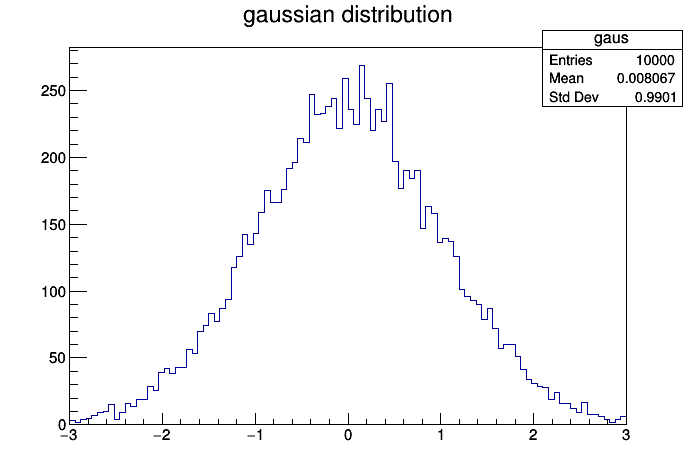

In [1]:
TF1 f1("f1","TMath::Gaus(x,[0],[1])",-5.,5.);
f1.SetParameters(0,1);
TH1F hgaus("gaus","gaussian distribution",100,-3.,3.);
hgaus.FillRandom("f1",10000);
TCanvas can;
hgaus.Draw();
can.Draw();

This little example already makes use of a few different ROOT classes.
- The TF1 class is used to create a function that is later used to determine the shape of the distribution. The parameters in the second line correspond to the mean and sigma of the gaussian. https://root.cern.ch/doc/v610/classTF1.html
- The TF1F class creates the histogram object with a specified number of bins as well as minimum and maximum values for the x-axis. Here it is filled with 10000 random entries following the shape of the function we defined earlier. Alternatively, we could have called 'hgaus.FillRandom("gaus",10000);'. https://root.cern.ch/doc/v610/classTH1.html
- The TCanvas is created to have a space in which to draw the histogram. https://root.cern.ch/doc/v610/classTCanvas.html

Next, fit the histogram you just created with the gaussian function. You can find documentation for this procedure here: https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#fitting-histograms

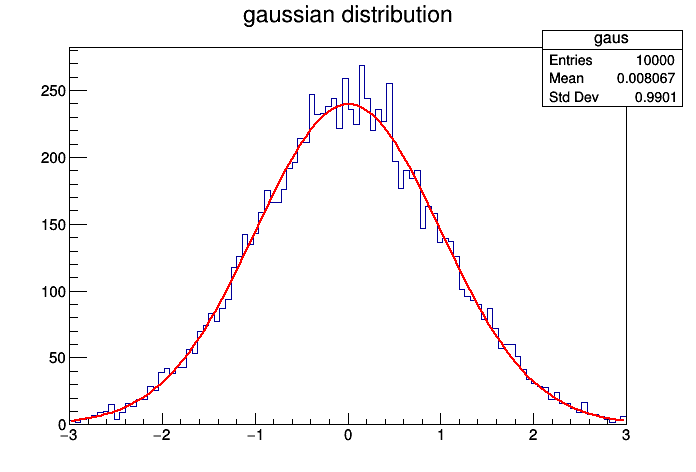

 FCN=78.849 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=2.87322e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.39420e+02   2.98901e+00   1.04878e-02   3.07903e-04
   2  Mean         9.56366e-03   1.01191e-02   4.41268e-05  -1.04706e-02
   3  Sigma        9.94429e-01   7.57122e-03   8.92460e-06   2.65667e-01


In [2]:
// put your code here
// you can continue using the objects you have created above

hgaus.Fit("gaus");
hgaus.Draw();
can.Draw();

Generate a uniform distribution and plot it along with the gaussian distribution in the same canvas.

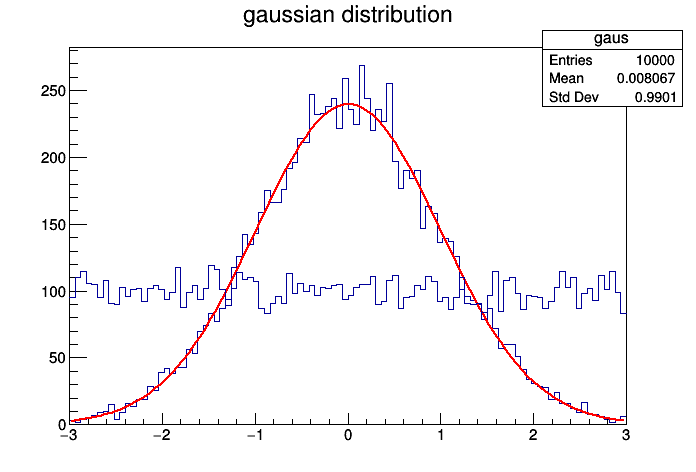

In [3]:
TH1F huniform("uniform","uniform distribution",100,-3.,3.);
huniform.FillRandom("pol0",10000);
huniform.Draw("same");
can.Draw();

As a default, ROOT displays histograms as a bar chart. Plot the histograms above in a way that statistical uncertainties are shown. Use red markers for the uniform distribution and blue ones for the gaussian. Further help can be found here:

https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#histograms

https://root.cern.ch/doc/v610/classTH1.html

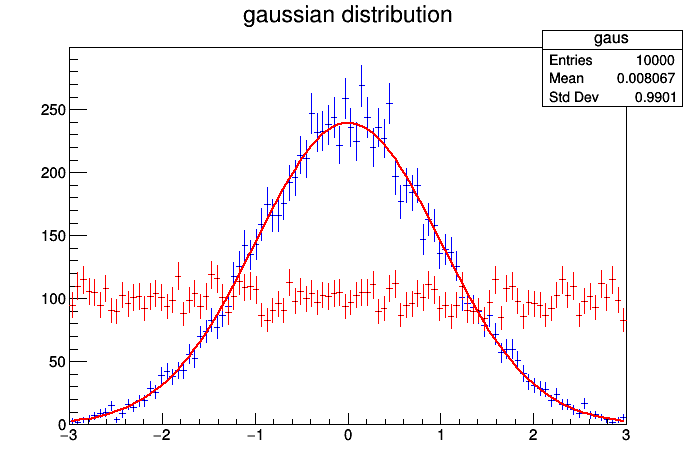

In [4]:
hgaus.SetLineColor(kBlue);
huniform.SetLineColor(kRed);
hgaus.Draw("e");
huniform.Draw("e same");
can.Draw();

Change the bin width of the histograms so the the uncertainty per bin becomes smaller.

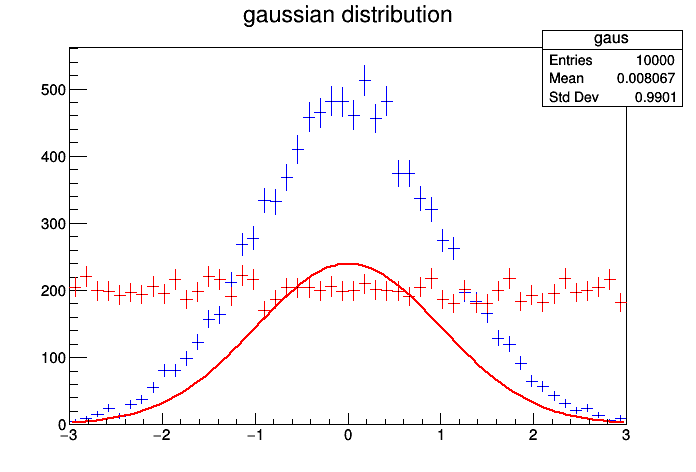

In [5]:
hgaus.Rebin(2);
huniform.Rebin(2);
hgaus.Draw("e");
huniform.Draw("e same");
can.Draw();

Create a new histogram containing the sum of the uniform and the gaussian distribution and plot it. Make sure that the y-axis starts at 0!

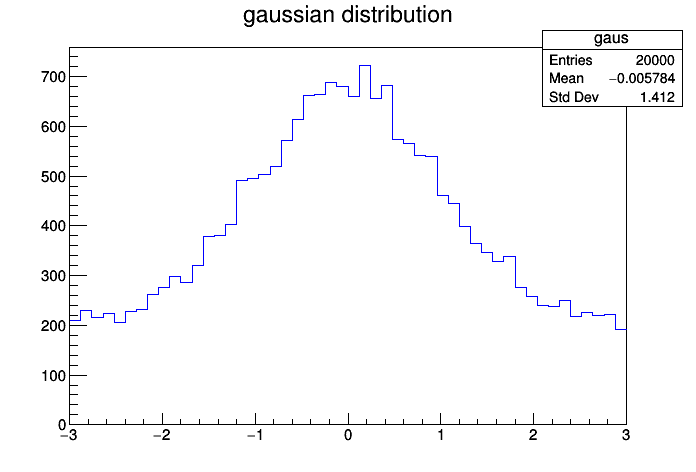

In [6]:
TH1F hsum("sum","sum of gaussian and uniform plot",50,-3.,3.);
hsum = hgaus + huniform;
hsum.SetMinimum(0);
hsum.Draw();
can.Draw();